In [60]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import sklearn.cluster as sc
#import matplotlib as plt


# 
# 计算SSE值，判断聚类的好坏
# 

#full_music_data = pd.read_csv('./data/full_music_data.csv')
#features = ['danceability','energy','valence','tempo','loudness',  'acousticness',  'instrumentalness',  'liveness',  'speechiness',  'duration_ms']
#pd.set_option('max_colwidth',100)
top_music = pd.read_csv('./data/music_top100_nolabel.csv')
PCA_list = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7']
PCA_weight = np.asarray([0.2625,0.1547,0.1194,0.0974,0.0906,0.079,0.068])

# min-max标准化
min_max = preprocessing.MinMaxScaler()
#music_data = top_music[PCA_list].values
music_data = top_music[PCA_list].values*PCA_weight#乘了权重
music_data = min_max.fit_transform(music_data)

# music_date就是归一化之后的数据

In [61]:
PCA_weight = np.asarray([0.2625,0.1547,0.1194,0.0974,0.0906,0.079,0.068]).transpose()
PCA_weight

array([0.2625, 0.1547, 0.1194, 0.0974, 0.0906, 0.079 , 0.068 ])

In [62]:
# 算sse_list
sse_list = []
max_clusters = 10
for i in range(1,max_clusters+1):
    #model = sc.KMeans(n_clusters=i,init="k-means++",n_init=10,max_iter=300,tol=1e-4,random_state=0)
    model = sc.KMeans(n_clusters=i)
    model.fit(music_data)
    sse_list.append(model.inertia_)
    #print(model.inertia_)
print(sse_list)

[3970.2067865068575, 2935.8153665554873, 2471.9030656195505, 2099.285428418757, 1814.8333201547264, 1697.8177567140465, 1595.3079876212269, 1498.9554976073346, 1423.4199552208536, 1336.870753431281]


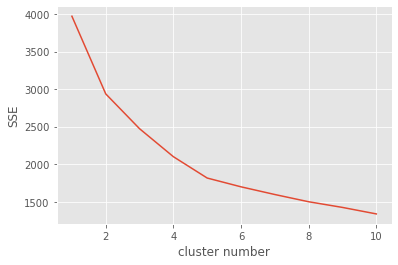

In [63]:
import matplotlib.pyplot as plt
plt.plot(range(1,max_clusters+1), sse_list)
plt.xlabel('cluster number')
plt.ylabel('SSE')
plt.show()
# 计算SSE

In [109]:
# 设置聚类数量为5
num_clusters = 5
model = sc.KMeans(n_clusters=num_clusters)
# 模型拟合与聚类预测
# 模型拟合
# 为每个示例分配一个集群
yhat = model.fit_predict(music_data)
#查看各个类数量
print(np.unique(yhat, return_counts=True))
# 合并label
top_music['label'] = yhat
#top_music里面是没有归一化的值
#top_music.head()

(array([0, 1, 2, 3, 4]), array([3808, 4922, 2352, 4884, 5148], dtype=int64))


In [110]:
music_pd = pd.DataFrame(data=music_data, columns=PCA_list)
music_pd['label'] = yhat
#music_pd.head()

In [111]:
from scipy import stats
import seaborn as sns
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

def plt_single(single_cluster_test,title):
    #绘图
    plt.style.use('ggplot')
    sns.distplot(single_cluster_test['PC1'].values, hist=False, kde=False, fit=stats.norm, fit_kws={'color':'black','label':'PC1','linestyle':'-'})
    sns.distplot(single_cluster_test['PC2'].values, hist=False, kde=False, fit=stats.norm, fit_kws={'color':'red','label':'PC2','linestyle':'--'})
    sns.distplot(single_cluster_test['PC3'].values, hist=False, kde=False, fit=stats.norm, fit_kws={'color':'blue','label':'PC3','linestyle':':'})
    sns.distplot(single_cluster_test['PC4'].values, hist=False, kde=False, fit=stats.norm, fit_kws={'color':'purple','label':'PC4','linestyle':'-.'})
    sns.distplot(single_cluster_test['PC5'].values, hist=False, kde=False, fit=stats.norm, fit_kws={'color':'green','label':'PC5','linestyle':'dashed'})
    sns.distplot(single_cluster_test['PC6'].values, hist=False, kde=False, fit=stats.norm, fit_kws={'color':'yellow','label':'PC6','linestyle':'dashdot'})
    sns.distplot(single_cluster_test['PC7'].values, hist=False, kde=False, fit=stats.norm, fit_kws={'color':'darkorange','label':'PC7','linestyle':'dotted'})
    #title = 'Cluster: ' + str(cluster)
    plt.title(title)
    #呈现图例
    plt.legend()
    #呈现图形
    plt.show()
    return
single_cluster_test = music_pd[music_pd['label'] == 1]
#plt_single(single_cluster_test, title='test')

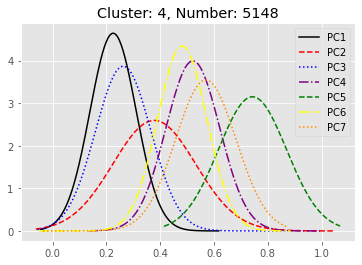

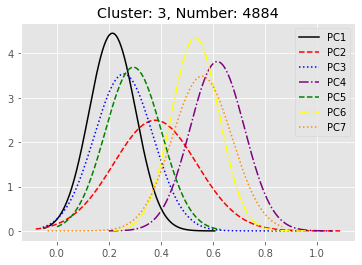

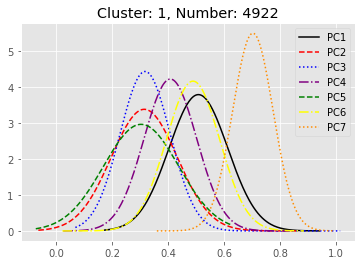

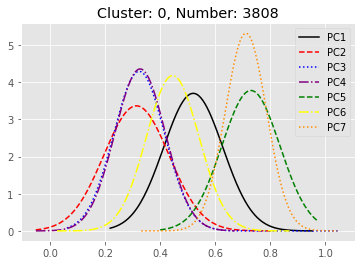

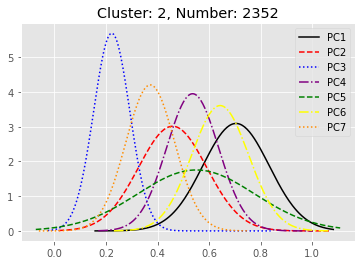

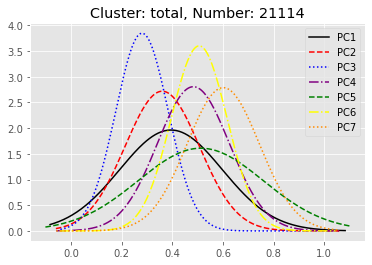

In [112]:

for i in pd.unique(yhat):
    single_cluster = music_pd[music_pd['label'] == i]
    title = 'Cluster: ' + str(i) +', Number: ' + str(len(single_cluster))
    plt_single(single_cluster_test=single_cluster, title=title)
# 总体的图
title = 'Cluster: ' + 'total' +', Number: ' + str(len(music_pd))
plt_single(music_pd, title=title)
# 把title修改一下

[0.24619770947940856, 0.22022989000503077, 0.24537882041011344, 0.2352747678579447, 0.2223180137481672, 0.2157653931340568, 0.2083019061623624, 0.2134230933978052, 0.21127306052151018, 0.2071861342413723]


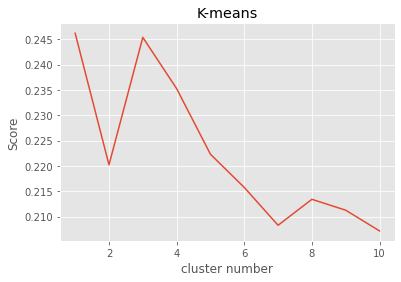

In [108]:
# K-means
# 从轮廓系数看多少个聚类数合适
# 算轮廓系数
from sklearn.metrics import silhouette_score

Scores = []
max_clusters = 11
for i in range(2,max_clusters+1):
    #model = sc.KMeans(n_clusters=i,init="k-means++",n_init=10,max_iter=300,tol=1e-4,random_state=0)
    model = sc.KMeans(n_clusters=i)
    model.fit(music_data)
    score = silhouette_score(music_data, model.labels_, metric='euclidean')
    #print(score, i)
    Scores.append(score)

print(Scores)

import matplotlib.pyplot as plt
plt.plot(range(1,max_clusters), Scores)
plt.title('K-means')
plt.xlabel('cluster number')
plt.ylabel('Score')
plt.show()

In [113]:
# 层次聚类
# 从轮廓系数看多少个聚类数合适
# 算轮廓系数
from sklearn.metrics import silhouette_score

Scores = []
max_clusters = 11
for i in range(2,max_clusters+1):
    #model = sc.KMeans(n_clusters=i,init="k-means++",n_init=10,max_iter=300,tol=1e-4,random_state=0)
    #model = sc.KMeans(n_clusters=i)
    model = sc.AgglomerativeClustering(n_clusters=i)
    model.fit(music_data)
    score = silhouette_score(music_data, model.labels_, metric='euclidean')
    #print(score, i)
    Scores.append(score)

print(Scores)

import matplotlib.pyplot as plt
plt.plot(range(2,max_clusters+1), Scores)
plt.title('ceng ci')
plt.xlabel('cluster number')
plt.ylabel('Score')
plt.show()

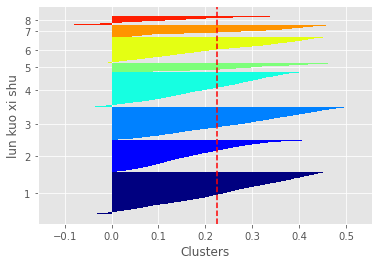

In [ ]:
# K-Means
# 轮廓系数
from matplotlib import cm
from sklearn.metrics import silhouette_samples

num_clusters = 5
model = sc.KMeans(n_clusters=num_clusters)
#model = sc.AgglomerativeClustering(n_clusters=num_clusters)
yhat = model.fit_predict(music_data)
# 获取簇标号
cluster_labels = np.unique(yhat)
# 获取簇个数
n_clusters = cluster_labels.shape[0]
# 基于欧式距离计算轮廓系数
silhoutte_vals = silhouette_samples(music_data, yhat, metric="euclidean")
# 设置y坐标的起始位置
y_ax_lower,y_ax_upper=0,0
yticks=[]
for i,c in enumerate(cluster_labels):
    # 获取不同簇的轮廓系数
    c_silhouette_vals = silhoutte_vals[yhat == c]
    # 对簇中样本的轮廓系数从小到大进行排序
    c_silhouette_vals.sort()
    # 获取簇中轮廓系数的个数
    y_ax_upper += len(c_silhouette_vals)
    # 获取不同颜色
    color = cm.jet(i / n_clusters)
    # 绘制水平直方图
    plt.barh(range(y_ax_lower,y_ax_upper), c_silhouette_vals, height=1.0, edgecolor="none",color=color)
    # 获取显示y轴刻度的位置
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    # 下一个y轴的起点位置
    y_ax_lower += len(c_silhouette_vals)

# 获取轮廓系数的平均值
silhouette_avg = np.mean(silhoutte_vals)
# 绘制一条平行于y轴的轮廓系数平均值的虚线
plt.axvline(silhouette_avg, color="red",linestyle="--")
# 设置y轴显示的刻度
plt.yticks(yticks, cluster_labels+1)
plt.xlabel('Clusters')
plt.ylabel('lun kuo xi shu')
plt.show()

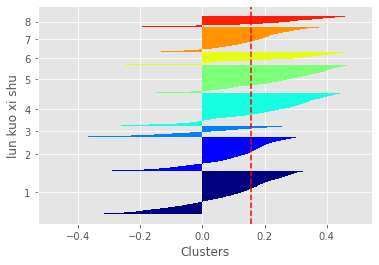

In [105]:
# 层次聚类
# 轮廓系数
from matplotlib import cm
from sklearn.metrics import silhouette_samples

num_clusters = 5
#model = sc.KMeans(n_clusters=num_clusters)
model = sc.AgglomerativeClustering(n_clusters=num_clusters)
yhat = model.fit_predict(music_data)
# 获取簇标号
cluster_labels = np.unique(yhat)
# 获取簇个数
n_clusters = cluster_labels.shape[0]
# 基于欧式距离计算轮廓系数
silhoutte_vals = silhouette_samples(music_data, yhat, metric="euclidean")
# 设置y坐标的起始位置
y_ax_lower,y_ax_upper=0,0
yticks=[]
for i,c in enumerate(cluster_labels):
    # 获取不同簇的轮廓系数
    c_silhouette_vals = silhoutte_vals[yhat == c]
    # 对簇中样本的轮廓系数从小到大进行排序
    c_silhouette_vals.sort()
    # 获取簇中轮廓系数的个数
    y_ax_upper += len(c_silhouette_vals)
    # 获取不同颜色
    color = cm.jet(i / n_clusters)
    # 绘制水平直方图
    plt.barh(range(y_ax_lower,y_ax_upper), c_silhouette_vals, height=1.0, edgecolor="none",color=color)
    # 获取显示y轴刻度的位置
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    # 下一个y轴的起点位置
    y_ax_lower += len(c_silhouette_vals)

# 获取轮廓系数的平均值
silhouette_avg = np.mean(silhoutte_vals)
# 绘制一条平行于y轴的轮廓系数平均值的虚线
plt.axvline(silhouette_avg, color="red",linestyle="--")
# 设置y轴显示的刻度
plt.yticks(yticks, cluster_labels+1)
plt.xlabel('Clusters')
plt.ylabel('lun kuo xi shu')
plt.show()